### Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor

### Read the data set and display it

In [2]:
data = pd.read_csv("House_Price.csv")
data

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,NO,9.348,12.1792,Lake and River,27,YES,0.056006
502,20.6,0.04527,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,YES,6.612,13.1648,Lake and River,20,YES,0.059903
503,23.9,0.06076,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,NO,5.478,12.1912,None,31,YES,0.057572
504,22.0,0.10959,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,YES,7.940,15.1760,None,47,YES,0.060694


### Columns

In [3]:
data.columns

Index(['price', 'crime_rate', 'resid_area', 'air_qual', 'room_num', 'age',
       'dist1', 'dist2', 'dist3', 'dist4', 'teachers', 'poor_prop', 'airport',
       'n_hos_beds', 'n_hot_rooms', 'waterbody', 'rainfall', 'bus_ter',
       'parks'],
      dtype='object')

In [4]:
data.duplicated().sum()

0

### Checking null values

In [5]:
data.isnull().sum()

price          0
crime_rate     0
resid_area     0
air_qual       0
room_num       0
age            0
dist1          0
dist2          0
dist3          0
dist4          0
teachers       0
poor_prop      0
airport        0
n_hos_beds     8
n_hot_rooms    0
waterbody      0
rainfall       0
bus_ter        0
parks          0
dtype: int64

### Removing null values

In [6]:
imputer = SimpleImputer(strategy ="most_frequent")
data["n_hos_beds"]=imputer.fit_transform(data[['n_hos_beds']])

In [7]:
data.isnull().sum()

price          0
crime_rate     0
resid_area     0
air_qual       0
room_num       0
age            0
dist1          0
dist2          0
dist3          0
dist4          0
teachers       0
poor_prop      0
airport        0
n_hos_beds     0
n_hot_rooms    0
waterbody      0
rainfall       0
bus_ter        0
parks          0
dtype: int64

### checking datatypes

In [8]:
data.dtypes
# data.info()

price          float64
crime_rate     float64
resid_area     float64
air_qual       float64
room_num       float64
age            float64
dist1          float64
dist2          float64
dist3          float64
dist4          float64
teachers       float64
poor_prop      float64
airport         object
n_hos_beds     float64
n_hot_rooms    float64
waterbody       object
rainfall         int64
bus_ter         object
parks          float64
dtype: object

### drop unwanted columns from the dataset

In [9]:
data =data.drop(['teachers','room_num'],axis=1)
data

,price,crime_rate,resid_area,air_qual,age,dist1,dist2,dist3,dist4,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,65.2,4.35,3.81,4.18,4.01,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,78.9,4.99,4.70,5.12,5.06,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,61.1,5.03,4.86,5.01,4.97,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,45.8,6.21,5.93,6.16,5.96,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,54.2,6.16,5.86,6.37,5.86,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,41.93,0.573,69.1,2.64,2.45,2.76,2.06,9.67,NO,9.348,12.1792,Lake and River,27,YES,0.056006
502,20.6,0.04527,41.93,0.573,76.7,2.44,2.11,2.46,2.14,9.08,YES,6.612,13.1648,Lake and River,20,YES,0.059903
503,23.9,0.06076,41.93,0.573,91.0,2.34,2.06,2.29,1.98,5.64,NO,5.478,12.1912,None,31,YES,0.057572
504,22.0,0.10959,41.93,0.573,89.3,2.54,2.31,2.40,2.31,6.48,YES,7.940,15.1760,None,47,YES,0.060694


### convert any string data to numerical data using suitable conversion

In [10]:
airport =LabelEncoder()
data['airport']=airport.fit_transform(data["airport"])
waterbody =LabelEncoder()
data['waterbody']=waterbody.fit_transform(data['waterbody'])
bus_ter=LabelEncoder()
data['bus_ter']=bus_ter.fit_transform(data['bus_ter'])

In [11]:
data.head()

,price,crime_rate,resid_area,air_qual,age,dist1,dist2,dist3,dist4,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,65.2,4.35,3.81,4.18,4.01,4.98,1,5.480,11.1920,3,23,0,0.049347
1,21.6,0.02731,37.07,0.469,78.9,4.99,4.70,5.12,5.06,9.14,0,7.332,12.1728,0,42,0,0.046146
2,34.7,0.02729,37.07,0.469,61.1,5.03,4.86,5.01,4.97,4.03,0,7.394,101.1200,2,38,0,0.045764
3,33.4,0.03237,32.18,0.458,45.8,6.21,5.93,6.16,5.96,2.94,1,9.268,11.2672,0,45,0,0.047151
4,36.2,0.06905,32.18,0.458,54.2,6.16,5.86,6.37,5.86,5.33,0,8.824,11.2896,0,55,0,0.039474


### Correlation

In [12]:
correlation=data.corr()
correlation

,price,crime_rate,resid_area,air_qual,age,dist1,dist2,dist3,dist4,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
price,1.000000,-0.389582,-0.484754,-0.429300,-0.377999,0.251355,0.249459,0.246650,0.248200,-0.740836,0.182867,0.114401,0.023122,0.017021,-0.047426,NaN,-0.391574
crime_rate,-0.389582,1.000000,0.406583,0.420972,0.352734,-0.380050,-0.379813,-0.380069,-0.376462,0.455621,-0.086805,0.013477,0.013518,0.001586,0.059204,NaN,0.383235
resid_area,-0.484754,0.406583,1.000000,0.763651,0.644779,-0.706481,-0.707956,-0.707566,-0.705819,0.603800,-0.115401,0.003804,-0.000839,-0.039977,0.055810,NaN,0.707635
air_qual,-0.429300,0.420972,0.763651,1.000000,0.731470,-0.768589,-0.769724,-0.769157,-0.764873,0.590879,-0.073903,-0.058043,-0.004882,0.012170,0.092104,NaN,0.915544
age,-0.377999,0.352734,0.644779,0.731470,1.000000,-0.746904,-0.746493,-0.747021,-0.746707,0.602339,0.005101,-0.025785,0.009380,-0.039276,0.075198,NaN,0.673850
dist1,0.251355,-0.380050,-0.706481,-0.768589,-0.746904,1.000000,0.997905,0.997735,0.994073,-0.498823,0.025208,-0.021914,-0.014463,-0.004340,-0.036794,NaN,-0.706319
dist2,0.249459,-0.379813,-0.707956,-0.769724,-0.746493,0.997905,1.000000,0.998097,0.994003,-0.495693,0.020056,-0.022617,-0.010239,-0.006835,-0.038005,NaN,-0.708237
dist3,0.246650,-0.380069,-0.707566,-0.769157,-0.747021,0.997735,0.998097,1.000000,0.994126,-0.494290,0.020195,-0.020239,-0.010077,-0.001972,-0.041470,NaN,-0.709346
dist4,0.248200,-0.376462,-0.705819,-0.764873,-0.746707,0.994073,0.994003,0.994126,1.000000,-0.496084,0.020022,-0.014225,-0.005850,-0.003233,-0.032542,NaN,-0.703508
poor_prop,-0.740836,0.455621,0.603800,0.590879,0.602339,-0.498823,-0.495693,-0.494290,-0.496084,1.000000,-0.095054,-0.074824,0.003337,-0.055669,0.061581,NaN,0.552310


### Finding outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x29df1c70af0>,
 'caps': [<matplotlib.lines.Line2D at 0x29df1c8c190>,
 'boxes': [<matplotlib.patches.PathPatch at 0x29df1c70670>],
 'medians': [<matplotlib.lines.Line2D at 0x29df1c8c8b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29df1c8cc40>],
 'means': []}

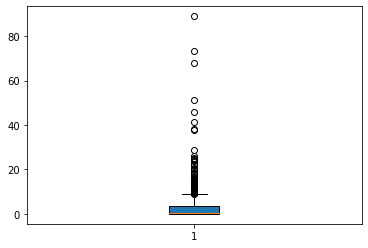

In [13]:
plt.boxplot(data["crime_rate"],patch_artist=True)

### Removing outliers using IQR method

In [14]:
print(f"old shape of data {data.shape}")
Q1=data["crime_rate"].quantile(0.25)
Q3=data["crime_rate"].quantile(0.75)
IQR=Q3-Q1
print(Q3,Q1,IQR)
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
lower_index=np.where(data["crime_rate"]<=lower)[0]
upper_index=np.where(data["crime_rate"]>=upper)[0]
data.drop(index=lower_index,inplace=True)
data.drop(index=upper_index,inplace=True)
print(f"new shape of data {data.shape}")

old shape of data (506, 17)
3.6770825 0.08204499999999999 3.5950375
new shape of data (440, 17)


In [15]:
data.reset_index(inplace=True)

In [16]:
data.drop('index', axis=1, inplace=True)

In [17]:
data

,price,crime_rate,resid_area,air_qual,age,dist1,dist2,dist3,dist4,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,65.2,4.35,3.81,4.18,4.01,4.98,1,5.480,11.1920,3,23,0,0.049347
1,21.6,0.02731,37.07,0.469,78.9,4.99,4.70,5.12,5.06,9.14,0,7.332,12.1728,0,42,0,0.046146
2,34.7,0.02729,37.07,0.469,61.1,5.03,4.86,5.01,4.97,4.03,0,7.394,101.1200,2,38,0,0.045764
3,33.4,0.03237,32.18,0.458,45.8,6.21,5.93,6.16,5.96,2.94,1,9.268,11.2672,0,45,0,0.047151
4,36.2,0.06905,32.18,0.458,54.2,6.16,5.86,6.37,5.86,5.33,0,8.824,11.2896,0,55,0,0.039474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,22.4,0.06263,41.93,0.573,69.1,2.64,2.45,2.76,2.06,9.67,0,9.348,12.1792,1,27,0,0.056006
436,20.6,0.04527,41.93,0.573,76.7,2.44,2.11,2.46,2.14,9.08,1,6.612,13.1648,1,20,0,0.059903
437,23.9,0.06076,41.93,0.573,91.0,2.34,2.06,2.29,1.98,5.64,0,5.478,12.1912,2,31,0,0.057572
438,22.0,0.10959,41.93,0.573,89.3,2.54,2.31,2.40,2.31,6.48,1,7.940,15.1760,2,47,0,0.060694


{'whiskers': [<matplotlib.lines.Line2D at 0x29df1d82520>,
 'caps': [<matplotlib.lines.Line2D at 0x29df1d82c40>,
 'boxes': [<matplotlib.patches.PathPatch at 0x29df1d82130>],
 'medians': [<matplotlib.lines.Line2D at 0x29df1d8e3a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29df1d8e730>],
 'means': []}

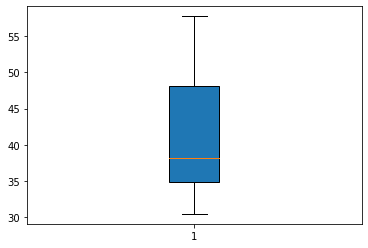

In [18]:
plt.boxplot(data["resid_area"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x29df1def5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x29df1defd00>,
 'boxes': [<matplotlib.patches.PathPatch at 0x29df1def1f0>],
 'medians': [<matplotlib.lines.Line2D at 0x29df1dfa460>],
 'fliers': [<matplotlib.lines.Line2D at 0x29df1dfa7f0>],
 'means': []}

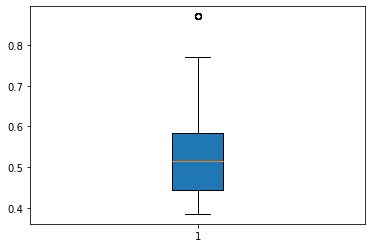

In [19]:
plt.boxplot(data["air_qual"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x29df1e5b0a0>,
 'caps': [<matplotlib.lines.Line2D at 0x29df1e5b6d0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x29df1e4bd00>],
 'medians': [<matplotlib.lines.Line2D at 0x29df1e5bdf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29df1e671c0>],
 'means': []}

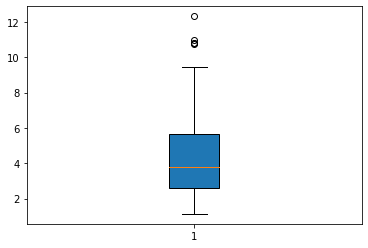

In [20]:
plt.boxplot(data["dist1"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x29df1eb8f70>,
 'caps': [<matplotlib.lines.Line2D at 0x29df1ec76d0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x29df1eb8bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x29df1ec7df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29df1ed31c0>],
 'means': []}

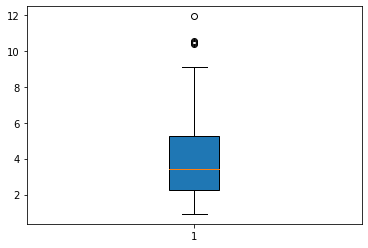

In [21]:
plt.boxplot(data["dist2"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x29df1f23a90>,
 'caps': [<matplotlib.lines.Line2D at 0x29df1f30220>,
 'boxes': [<matplotlib.patches.PathPatch at 0x29df1f236a0>],
 'medians': [<matplotlib.lines.Line2D at 0x29df1f30940>],
 'fliers': [<matplotlib.lines.Line2D at 0x29df1f30cd0>],
 'means': []}

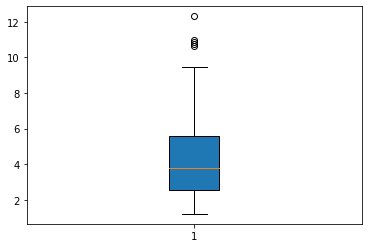

In [22]:
plt.boxplot(data["dist3"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x29df1f90610>,
 'caps': [<matplotlib.lines.Line2D at 0x29df1f90d60>,
 'boxes': [<matplotlib.patches.PathPatch at 0x29df1f90250>],
 'medians': [<matplotlib.lines.Line2D at 0x29df1f9d4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29df1f9d850>],
 'means': []}

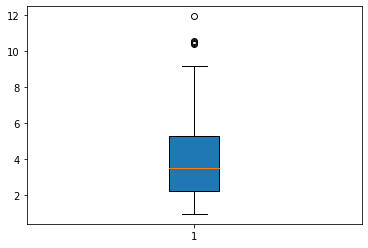

In [23]:
plt.boxplot(data["dist4"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x29df1ffc130>,
 'caps': [<matplotlib.lines.Line2D at 0x29df1ffc850>,
 'boxes': [<matplotlib.patches.PathPatch at 0x29df1febd90>],
 'medians': [<matplotlib.lines.Line2D at 0x29df1ffcf70>],
 'fliers': [<matplotlib.lines.Line2D at 0x29df2007340>],
 'means': []}

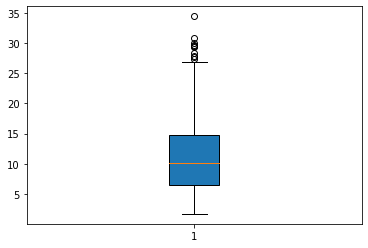

In [24]:
plt.boxplot(data["poor_prop"],patch_artist=True)

In [25]:
print(f"old shape of data {data.shape}")
Q1=data["poor_prop"].quantile(0.25)
Q3=data["poor_prop"].quantile(0.75)
IQR=Q3-Q1
print(Q3,Q1,IQR)
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
lower_index=np.where(data["poor_prop"]<=lower)[0]
upper_index=np.where(data["poor_prop"]>=upper)[0]
data.drop(index=lower_index,inplace=True)
data.drop(index=upper_index,inplace=True)
print(f"new shape of data {data.shape}")

old shape of data (440, 17)
14.7225 6.5675 8.155000000000001
new shape of data (429, 17)


In [26]:
data.reset_index(inplace=True)
data.drop('index', axis=1, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x29df2056d60>,
 'caps': [<matplotlib.lines.Line2D at 0x29df20633a0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x29df2056a00>],
 'medians': [<matplotlib.lines.Line2D at 0x29df2063ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29df2063e50>],
 'means': []}

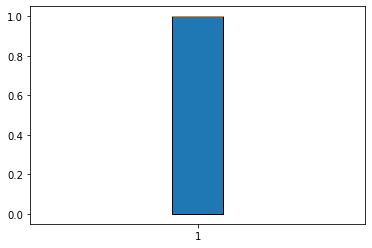

In [27]:
plt.boxplot(data["airport"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x29df308ef10>,
 'caps': [<matplotlib.lines.Line2D at 0x29df309e670>,
 'boxes': [<matplotlib.patches.PathPatch at 0x29df308eb20>],
 'medians': [<matplotlib.lines.Line2D at 0x29df309ed00>],
 'fliers': [<matplotlib.lines.Line2D at 0x29df30aa0d0>],
 'means': []}

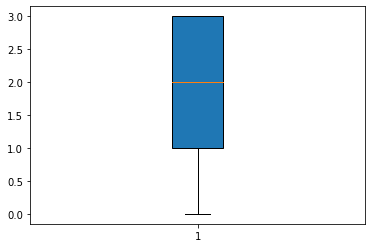

In [28]:
plt.boxplot(data["waterbody"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x29df30ffa30>,
 'caps': [<matplotlib.lines.Line2D at 0x29df310d190>,
 'boxes': [<matplotlib.patches.PathPatch at 0x29df30ff670>],
 'medians': [<matplotlib.lines.Line2D at 0x29df310d8b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29df310dc40>],
 'means': []}

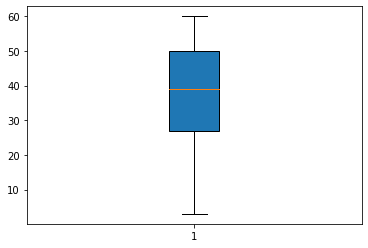

In [29]:
plt.boxplot(data["rainfall"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x29df316c580>,
 'caps': [<matplotlib.lines.Line2D at 0x29df316cca0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x29df316c1c0>],
 'medians': [<matplotlib.lines.Line2D at 0x29df31783a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29df3178730>],
 'means': []}

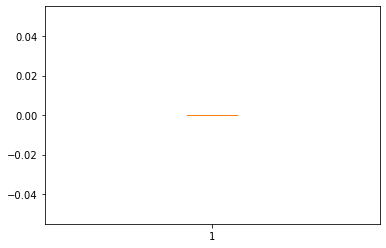

In [30]:
plt.boxplot(data["bus_ter"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x29df31cba30>,
 'caps': [<matplotlib.lines.Line2D at 0x29df31d7190>,
 'boxes': [<matplotlib.patches.PathPatch at 0x29df31cb670>],
 'medians': [<matplotlib.lines.Line2D at 0x29df31d7850>],
 'fliers': [<matplotlib.lines.Line2D at 0x29df31d7be0>],
 'means': []}

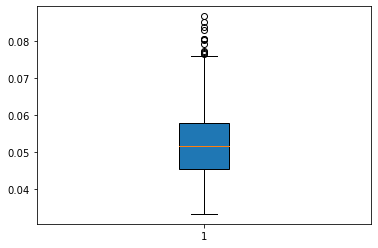

In [31]:
plt.boxplot(data["parks"],patch_artist=True)

In [32]:
print(f"old shape of data {data.shape}")
Q1=data["parks"].quantile(0.25)
Q3=data["parks"].quantile(0.75)
IQR=Q3-Q1
print(Q3,Q1,IQR)
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
lower_index=np.where(data["parks"]<=lower)[0]
upper_index=np.where(data["parks"]>=upper)[0]
data.drop(index=lower_index,inplace=True)
data.drop(index=upper_index,inplace=True)
print(f"new shape of data {data.shape}")

old shape of data (429, 17)
0.057770199 0.045462478 0.012307721
new shape of data (417, 17)


In [33]:
data.reset_index(inplace=True)
data.drop('index', axis=1, inplace=True)

### Identify the dependent variable(target/output label) and indepentent variable(input features)


In [34]:
x=data.drop('price',axis =1)
y=data['price']

In [35]:
x

,crime_rate,resid_area,air_qual,age,dist1,dist2,dist3,dist4,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,0.00632,32.31,0.538,65.2,4.35,3.81,4.18,4.01,4.98,1,5.480,11.1920,3,23,0,0.049347
1,0.02731,37.07,0.469,78.9,4.99,4.70,5.12,5.06,9.14,0,7.332,12.1728,0,42,0,0.046146
2,0.02729,37.07,0.469,61.1,5.03,4.86,5.01,4.97,4.03,0,7.394,101.1200,2,38,0,0.045764
3,0.03237,32.18,0.458,45.8,6.21,5.93,6.16,5.96,2.94,1,9.268,11.2672,0,45,0,0.047151
4,0.06905,32.18,0.458,54.2,6.16,5.86,6.37,5.86,5.33,0,8.824,11.2896,0,55,0,0.039474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,0.06263,41.93,0.573,69.1,2.64,2.45,2.76,2.06,9.67,0,9.348,12.1792,1,27,0,0.056006
413,0.04527,41.93,0.573,76.7,2.44,2.11,2.46,2.14,9.08,1,6.612,13.1648,1,20,0,0.059903
414,0.06076,41.93,0.573,91.0,2.34,2.06,2.29,1.98,5.64,0,5.478,12.1912,2,31,0,0.057572
415,0.10959,41.93,0.573,89.3,2.54,2.31,2.40,2.31,6.48,1,7.940,15.1760,2,47,0,0.060694


In [36]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
412    22.4
413    20.6
414    23.9
415    22.0
416    19.0
Name: price, Length: 417, dtype: float64

### split the data into train and test data

In [37]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=12)

In [38]:
x_train.shape ,x_test.shape

((333, 16), (84, 16))

### Define and train (fit) the linear regression model using training data


In [39]:
#model training
model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

### Test(predict) the output for the test data using the fitted model

In [40]:
model1.coef_  

array([ 2.38488296e-01, -2.13587073e-01, -1.09099343e+01,  4.15422659e-02,
        1.91982605e+00, -8.90004864e-01, -2.20451412e-01, -1.88886819e+00,
       -1.26971149e+00,  1.27185412e+00,  2.82608636e-01,  3.72114588e-02,
       -1.49477381e-01, -1.40459161e-03,  0.00000000e+00,  2.98010683e+01])

In [41]:
model1.intercept_

48.11756800528403

### Model perfomance checking for underfitting and overfitting

In [42]:
model1.score(x_test,y_test)

0.6254050966295045

In [43]:
model1.score(x_train,y_train)

0.6027823671011965

In [44]:
y_pred = model1.predict(x_test)

In [45]:
pd.DataFrame({'True values':y_test, 'Predicted values':y_pred})

,True values,Predicted values
288,33.4,34.225994
258,33.2,29.504873
351,11.5,12.850152
6,22.9,21.380140
295,21.6,29.589738
...,...,...
137,15.6,16.349360
349,50.0,30.182357
296,23.8,28.941932
367,13.0,16.050987


In [46]:
mean_absolute_error(y_test,y_pred)

3.8743824541861906

In [47]:
mean_squared_error(y_test,y_pred)

30.673773208882398

In [48]:
model1.predict([[1,1,.5,.2,.8,.5,.3,.4,1,1,.3,.4,.5,1,1,2]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([102.59278946])

### Decision Tree Regression

In [49]:
model2=DecisionTreeRegressor()
model2.fit(x_train,y_train)

DecisionTreeRegressor()

In [50]:
model2.get_depth()

19

In [51]:
print("Test Score",model2.score(x_test,y_test))
print("Train Score",model2.score(x_train,y_train))
y_pred2=model2.predict(x_test)
print("Error",mean_squared_error(y_test,y_pred2))

Test Score 0.6356178500374198
Train Score 1.0
Error 29.837500000000006


In [52]:
model3=DecisionTreeRegressor(max_depth=10)
model3.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10)

In [53]:
print("Test Score",model3.score(x_test,y_test))
print("Train Score",model3.score(x_train,y_train))
ypred3=model3.predict(x_test)
print("Ërror",mean_squared_error(y_test,ypred3))

Test Score 0.6440983680554517
Train Score 0.990319693027758
Ërror 29.143071207620864


In [54]:
model4=DecisionTreeRegressor(max_depth=5)
model4.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [55]:
print("Test Score",model4.score(x_test,y_test))
print("Train Score",model4.score(x_train,y_train))
ypred4=model4.predict(x_test)
print("Error",mean_squared_error(y_test,ypred4))

Test Score 0.681635976901436
Train Score 0.8875803524993746
Error 26.069297138125222
